# SVM for classification, without and with kernels

In this notebook we are going to explore the use of Support Vector Machines (SVMs) for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

The dataset consists of 70,000 images of handwritten digits (i.e., 0, 1, ... 9). Each image is 28 pixels by 28 pixels and we can think of it as a vector of 28x28 = 784 numbers. Each number is an integer between 0 and 255. For each image we have the corresponding label (i.e., 0, 1, ..., 9).

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.datasets import fetch_mldata

In [2]:
#fix your ID ("numero di matricola") and the seed for random generator
ID = 1100285 
np.random.seed(ID)

Now let's load the dataset. 'data' contains the input, 'target' contains the label. We normalize the data by dividing each value by 255 so that each value is in [0,1]

In [3]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
mnist = fetch_mldata("MNIST original")
# rescale the data
X, y = mnist.data / 255., mnist.target

Now split into training and test. We keep 500 samples in the training set. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

**IMPORTANT**: if you cannot run the SVM with 500 samples or 1000 samples (see below), try with a smaller number of samples (e.g. 200 here and 400 below).

In [4]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)

Labels and frequencies in training dataset: 


(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([56, 58, 42, 48, 50, 45, 49, 54, 51, 47], dtype=int64))

We now provide a function to print an image in a dataset, the corresponding true label, and the index of the image in the dataset.

In [5]:
#function for plotting a digit and printing the corresponding labe
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

As an example, let's print the 100-th image in X_train and the 40,000-th image in X_test and their true labels.

INPUT:


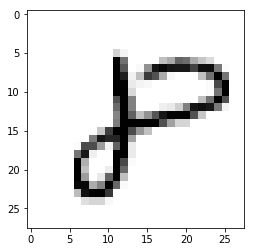

LABEL: 8
INPUT:


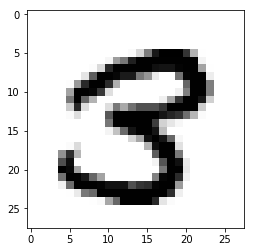

LABEL: 3


In [6]:
# let's try the plotting function
plot_digit(X_train,y_train,100)
plot_digit(X_test,y_test,40000)

# TO DO 1
Run SVM with cross validation to pick a kernel and values of parameters. Use a 5-fold cross-validation to pick the best kernel and choice of parameters. We provide some potential choice for parameters, but change the grid if needed (e.g., it takes too long). For the SVM for classification use SVC from sklearn.svm; for the grid search we suggest you use GridSearchCV from sklearn.model_selection, but you can implement your own cross-validation for model selection if you prefer.

Print the best parameters used as well as the score obtained by the best model

In [7]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}
nfolds = 5

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model uusing 5-fold CV 
#and train it using all the training data
grid_search = GridSearchCV(linear_SVM, parameters, cv=nfolds, return_train_score=True)
grid_search.fit(X_train, y_train) 

print ('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found: {}".format(grid_search.best_params_)) 

print("Score with best parameters: {}".format(grid_search.best_score_)) 

print("\nAll scores on the grid:\n")
print(pd.DataFrame(grid_search.cv_results_)) 

# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
grid_search = GridSearchCV(poly2_SVM, parameters, cv=nfolds, return_train_score=True)
grid_search.fit(X_train, y_train) # ADD CODE

print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found: {}".format(grid_search.best_params_)) 

print("Score with best parameters: {}".format(grid_search.best_score_)) 

print("\nAll scores on the grid:\n")
print(pd.DataFrame(grid_search.cv_results_))

# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')

# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL
grid_search = GridSearchCV(rbf_SVM, parameters, cv=nfolds, return_train_score=True)
grid_search.fit(X_train, y_train) 

print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found: {}".format(grid_search.best_params_)) 

print("Score with best parameters: {}".format(grid_search.best_score_)) 

print("\nAll scores on the grid:\n")
print(pd.DataFrame(grid_search.cv_results_))

RESULTS FOR LINEAR KERNEL

Best parameters set found: {'C': 1}
Score with best parameters: 0.888

All scores on the grid:

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.137493      0.011672         0.028122    6.249720e-03       1   
1       0.121877      0.006250         0.028126    6.259422e-03      10   
2       0.118742      0.007649         0.031251    6.843901e-07     100   

       params  split0_test_score  split1_test_score  split2_test_score  \
0    {'C': 1}           0.903846           0.911765               0.94   
1   {'C': 10}           0.903846           0.911765               0.94   
2  {'C': 100}           0.903846           0.911765               0.94   

   split3_test_score       ...         mean_test_score  std_test_score  \
0           0.826531       ...                   0.888        0.040849   
1           0.826531       ...                   0.888        0.040849   
2           0.826531       ...                   0.888   

## TO DO 2
For the "best" SVM kernel and choice of parameters from above, train the model on the entire training set and measure the training error. Also make predictions on the test set and measure the test error. Print the training and the test error.

In [8]:
#get training and test error for the best SVM model from CV
nfolds = 5
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

# best model rbf
rbf_SVM = SVC(kernel='rbf')
best_SVM = GridSearchCV(rbf_SVM, parameters, cv=nfolds)

# fit the model on the entire training set
best_SVM.fit(X_train, y_train) 

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.109655


## Use logistic regression for comparison

## TO DO 3

Just for comparison let's also use logistic regression, first default values of the parameter for regularization and then with cross-validation to fix the value of the parameter. For cross validation, use 5-fold cross validation and the default values of the regularization parameters for function the function linear_model.LogisticRegressionCV(...)

In [9]:
from sklearn import linear_model

lr = linear_model.LogisticRegression()
# fit the model on the training data
lr.fit(X_train,y_train) 

#compute training and test error for model above
training_error = 1. - lr.score(X_train,y_train) 
test_error = 1. - lr.score(X_test,y_test) 

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = linear_model.LogisticRegressionCV(cv=nfolds) 
lr_cv.fit(X_train,y_train)

training_error_cv = 1. - lr_cv.score(X_train,y_train) 
test_error_cv = 1. - lr_cv.score(X_test,y_test) 

print ("Best logistic regression training error: %f" % training_error_cv)
print ("Best logistic regression test error: %f" % test_error_cv)

Best logistic regression training error: 0.002000
Best logistic regression test error: 0.157396
Best logistic regression training error: 0.002000
Best logistic regression test error: 0.169727


## TO DO 4 
Compare and comment the results from SVM and logistic regression.

## Answer:

Based on the results, SVM gets an higher score and therefore a lower test error than logistic regression. This is due to the fact that SVM works even if data are not lineraly seperable, using the right kernel transformation, while LR doesn' t.

## TO DO 5
Write the code that finds and plot a digit that is missclassified by logistic regression (optimized for the regularization parameter) and correctly classified by the "best" SVM.

INPUT:


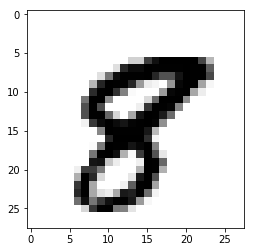

LABEL: 8
LR predict:  9.0
SVM predict:  8.0


In [13]:
# ADD CODE
Y_predicted_lr = lr_cv.predict(X_test)
Y_predicted_svm = best_SVM.predict(X_test)
for i,x in enumerate(y_test):
    if((Y_predicted_lr[i] != x) and (Y_predicted_svm[i] == x)):
        plot_digit(X_test,y_test,i)
        print("LR predict: ",Y_predicted_lr[i])
        print("SVM predict: ",Y_predicted_svm[i])
        break


## More data
Now let's do the same but using 1000 data points for training. 

## TO DO 6
Repeat the entire analysis above using 1000 samples. Of course you can copy the code from above.

Labels and frequencies in training dataset: 
INPUT:


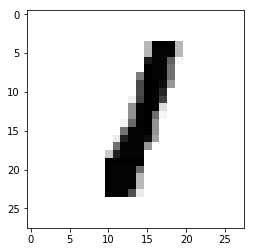

LABEL: 1
INPUT:


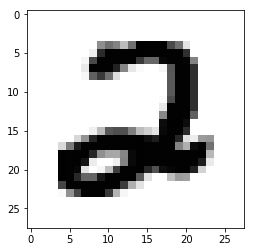

LABEL: 2

---------------------------

RESULTS FOR LINEAR KERNEL

Best parameters set found: {'C': 1}
Score with best parameters: 0.878

All scores on the grid:

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.31743      0.013844         0.098279        0.003185       1   
1        0.30523      0.003406         0.095867        0.002474      10   
2        0.31723      0.017087         0.100280        0.003865     100   

       params  split0_test_score  split1_test_score  split2_test_score  \
0    {'C': 1}           0.898058           0.860697              0.845   
1   {'C': 10}           0.898058           0.860697              0.845   
2  {'C': 100}           0.898058           0.860697              0.845   

   split3_test_score       ...         mean_test_score  std_test_score  \
0           0.857868       ...                   0.878        0.030692   
1           0.857868       ...                   0.878        0.030692   
2           0.8578

Best SVM training error: 0.000000
Best SVM test error: 0.083797

---------------------------

Best logistic regression training error: 0.004000
Best logistic regression test error: 0.142522
Best logistic regression training error: 0.008000
Best logistic regression test error: 0.145754

---------------------------

INPUT:


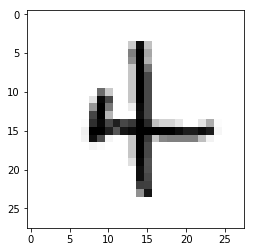

LABEL: 4
LR predict:  1.0
SVM predict:  4.0


In [14]:
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 1000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)


# let's try the plotting function
plot_digit(X_train,y_train,100)
plot_digit(X_test,y_test,40000)


print("\n---------------------------\n")


# parameters for linear SVM
parameters = {'C': [1, 10, 100]}
nfolds = 5

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model uusing 5-fold CV 
#and train it using all the training data
grid_search = GridSearchCV(linear_SVM, parameters, cv=nfolds, return_train_score=True)
grid_search.fit(X_train, y_train) 

print ('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found: {}".format(grid_search.best_params_)) 

print("Score with best parameters: {}".format(grid_search.best_score_)) 

print("\nAll scores on the grid:\n")
print(pd.DataFrame(grid_search.cv_results_)) 

# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
grid_search = GridSearchCV(poly2_SVM, parameters, cv=nfolds, return_train_score=True)
grid_search.fit(X_train, y_train) # ADD CODE

print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found: {}".format(grid_search.best_params_)) 

print("Score with best parameters: {}".format(grid_search.best_score_)) 

print("\nAll scores on the grid:\n")
print(pd.DataFrame(grid_search.cv_results_))

# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')

# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL
grid_search = GridSearchCV(rbf_SVM, parameters, cv=nfolds, return_train_score=True)
grid_search.fit(X_train, y_train) 

print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found: {}".format(grid_search.best_params_)) 

print("Score with best parameters: {}".format(grid_search.best_score_)) 

print("\nAll scores on the grid:\n")
print(pd.DataFrame(grid_search.cv_results_))


print("\n---------------------------\n")


#get training and test error for the best SVM model from CV
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}
nfolds = 5
best_SVM = GridSearchCV(SVC(kernel='rbf'), parameters, cv=nfolds) 

# fit the model on the entire training set
# ADD CODE
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)


print("\n---------------------------\n")


lr = linear_model.LogisticRegression()
# fit the model on the training data
lr.fit(X_train,y_train) 

#compute training and test error for model above
training_error = 1. - lr.score(X_train,y_train) 
test_error = 1. - lr.score(X_test,y_test) 

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = linear_model.LogisticRegressionCV(cv=nfolds) 
lr_cv.fit(X_train,y_train)
training_error_cv = 1. - lr_cv.score(X_train,y_train) 
test_error_cv = 1. - lr_cv.score(X_test,y_test) 

print ("Best logistic regression training error: %f" % training_error_cv)
print ("Best logistic regression test error: %f" % test_error_cv)


print("\n---------------------------\n")


# ADD CODE
Y_predicted_lr = lr_cv.predict(X_test)
Y_predicted_svm = best_SVM.predict(X_test)
for i,x in enumerate(y_test):
    if((Y_predicted_lr[i] != x) and (Y_predicted_svm[i] == x)):
        plot_digit(X_test,y_test,i)
        print("LR predict: ",Y_predicted_lr[i])
        print("SVM predict: ",Y_predicted_svm[i])
        break

## TO DO 7
Compare and comment on the differences with the results above.

### ANSWER: 

As we can see that if we double the size of the data points we do not see a big improvement in the loss.
In this case though with an bigger train test, SVM outperforms logistic regression. So if we have a lot of data and the computation is not too expensive we can definitely use a bigger set.